# Laboratorio 7 
Jose Jorge Perez, Diego Ruiz

_________

### ***Task 1.0: Exploración y Limpieza de Datos***

In [32]:
# Importar librerías 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn import metrics
import numpy as np

# Cargar el dataset
data = pd.read_csv('bank_transactions.csv')

data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


Se encontró que CustomerDOB contaba con datos faltantes. Por tal razón, posteriormente se utilizó un método para poder rellenar dichos datos faltantes.

Index(['CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance'], dtype='object')

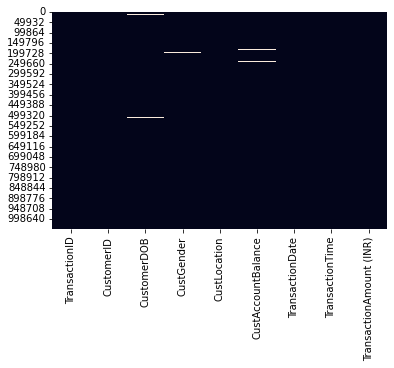

In [33]:
# Matriz de datos faltantes
sns.heatmap(data.isnull(), cbar=False)

# Mostrar columnas con datos faltantes, o con datos fuera de lugar (como un string en columna numérica)
data.columns[data.isnull().any()]

In [34]:
for col in data.columns[data.isnull().any()]:

    if data[col].dtype == 'float64' or data[col].dtype == 'int64':
        data[col].fillna(data[col].mean(), inplace=True)

    else:
        data[col].fillna(data[col].mode()[0], inplace=True)

data.columns[data.isnull().any()]


Index([], dtype='object')

In [35]:
data_copy = data.copy()

In [36]:
data = data_copy.copy()

### Encoding

In [37]:
import datetime
from datetime import timedelta, date
from sklearn.preprocessing import LabelEncoder

data['YOB'] = '19' + data['CustomerDOB'].str[-2:]
data['YOB'] = data['YOB'].astype(int)

data = data.drop(['CustomerDOB'], axis=1)

data['Age'] = 2023 - data['YOB']

data = data.drop(['YOB'], axis=1)

data['CustGender'] = data['CustGender'].map({'M': 0, 'F': 1})

data = data.drop(['TransactionID'], axis=1)
data = data.drop(['TransactionDate'], axis=1)

data = data.groupby(['CustomerID']).mean()

data.head()

C:\Users\JJ\AppData\Local\Temp/ipykernel_13520/4143366722.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['CustomerID']).mean()


,CustGender,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age
CustomerID,,,,,
C1010011,0.5,76340.635,67521.0,2553.0,35.5
C1010012,0.0,24204.490,204409.0,1499.0,29.0
C1010014,0.5,100112.950,187378.0,727.5,35.0
C1010018,1.0,496.180,170254.0,30.0,33.0
C1010024,0.0,87058.650,141103.0,5000.0,58.0


In [38]:
custGender = data['CustGender'].values
custAge = data['Age'].values
custAccountBalance = data['CustAccountBalance'].values
transactionAmount = data['TransactionAmount (INR)'].values
transactionType = data['TransactionTime'].values

data = pd.DataFrame({'CustGender': custGender, 'Age': custAge, 'CustAccountBalance': custAccountBalance, 'TransactionAmount (INR)': transactionAmount, 'TransactionTime': transactionType})

data = data[(data['CustGender'] == 0) | (data['CustGender'] == 1)]

print(data.head())

   CustGender   Age  CustAccountBalance  TransactionAmount (INR)  \
1         0.0  29.0           24204.490                   1499.0   
3         1.0  33.0             496.180                     30.0   
4         0.0  58.0           87058.650                   5000.0   
5         1.0  35.0          296828.370                    557.0   
6         0.0  37.0            5200.155                    932.0   

   TransactionTime  
1         204409.0  
3         170254.0  
4         141103.0  
5          95212.0  
6         162771.5  


### Balanceo
En este caso se determinó que no es necesario balancear los datos debido a que es un modelo no supervisado, por lo cual no se requiere.

### Escalar
Aca, se utilizó la librería de SKLearn para poder escalar y normalizar los datos que lo necesitaran. Asimismo, también se hizo un análisis pre y post escalamiento para determinar la distribución de los datos. En el preprocesamiento, se podía observar cómo ciertas variables tenían una alta desviación estándar a comparación de su respectiva media. Esto fue solucionado a través de la función de MinMaxScaler().

In [39]:
data2 = data.copy()

In [40]:

print('\n\nMedia y desviación estándar de cada columna:')
data2.describe()



Media y desviación estándar de cada columna:


,CustGender,Age,CustAccountBalance,TransactionAmount (INR),TransactionTime
count,824283.000000,824283.000000,8.242830e+05,8.242830e+05,824283.000000
mean,0.253167,43.107096,1.152263e+05,1.573144e+03,157055.751088
std,0.434826,21.180864,8.151974e+05,6.591278e+03,49957.649919
min,0.000000,24.000000,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,33.000000,5.243320e+03,1.800000e+02,124803.000000
50%,0.000000,36.500000,1.793333e+04,4.877150e+02,163732.000000
75%,1.000000,43.000000,6.048961e+04,1.217390e+03,195244.000000
max,1.000000,123.000000,1.150355e+08,1.560035e+06,235959.000000


In [41]:
from sklearn.preprocessing import StandardScaler, normalize

data3 = data2.drop(['CustGender'], axis=1)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data3)
normalized_df = normalize(scaled_features) 

df_feat = pd.DataFrame(normalized_df, columns=data3.columns)
df_feat['CustGender'] = data2['CustGender'].values
print(df_feat.head())

        Age  CustAccountBalance  TransactionAmount (INR)  TransactionTime  \
0 -0.572244           -0.095933                -0.009665         0.814395   
1 -0.782246           -0.230715                -0.383793         0.433087   
2  0.754764           -0.037091                 0.558087        -0.342775   
3 -0.289142            0.168286                -0.116460        -0.935154   
4 -0.819125           -0.383435                -0.276341         0.325035   

   CustGender  
0         0.0  
1         1.0  
2         0.0  
3         1.0  
4         0.0  


### Selección de Variables
Finalmente, se quiso determinar los 2 features que se estarían utilizando para la realización del modelo de agrupación. En este caso, se utilizó PCA para poder determinar qué 2 variables son las más significativas para los modelos a realizar, por eso se seleccionó transaction time junto con age.

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(df_feat) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

# determinar cuales variables fueron seleccionadas por PCA
selected_variables = []
for component in pca.components_:
    max_index = np.argmax(np.abs(component))
    selected_variables.append(df_feat.columns[max_index])
    
print(selected_variables)

['TransactionTime', 'Age']



## Mixture Models
1. Si considera necesario haga split del dataset como en los laboratorios anteriores. Recuerde que es un problema de aprendizaje no supervisado
En este caso, no se hizo split del dataset ya que no se tiene un problema de aprendizaje supervisado. Es decir, que no se está comprobando que el modelo realizado sepa clasificar datos. Simplemente se quiere crear agrupaciones de los clientes del banco.

2. Seleccione el número de clusters que mejor se adapte al dataset. Justifique su elección
Se utilizó la Gráfica de "Elbow" en ambos casos (Mixed Model manual y de SKLearn) para determinar el punto donde se estabiliza el Negative Log Likelihood (o NLL). Este punto donde se estabiliza dicho valor es conocido como el "codo" de una gráfica. A través de este procedimiento, en ambos casos, se determinó que la mejor cantidad de número de clusters era 4.

3. ¿Podría PCA ayudarle a mejorar la calidad de sus clusters?
PCA sí puede ayudar a mejorar la cantidad de nuestros clusters disminuyendo la cantidad de features que se encuentran en el dataset y que producen ruido, sin perder información importante para este. Esto especialmente considerando la gran cantidad de features que contiene el respectivo dataset.

4. Muestre al menos una gráfica que muestre cómo se dividen los clusters seleccionados. Seleccione dos features, justifique su elección
En este caso se crearon 2 gráficas, una para Mixed Model manual y otra para SKLearn. En ambos casos, se puede observar que se dividen los datos y cómo se crearon los respectivos clusters. Inicialmente, se había realizado el modelo con dos variables diferentes que habían sido escogido según su nivel de correlación entre sí (justo como se realizó en el Lab 7). Sin embargo, estas variables no presentaban los datos de manera óptima para señalizar las agrupaciones. Por tal razón, se optó por buscar otra manera para buscar las mejores variables.

5. Provea una métrica de desempeño, justificando su elección
Para seleccionar la cantidad de clusters, se utilizó le métrica de NLL y se graficaron los valores de WSS de diferentes modelos con distintos valores de clusters. Este valor indica el Negative Log Likelihood del modelo, y se buscaba encontrar aquel número de clusters que en la gráfica representara el codo de la misma.

Por otro lado, decidió utilizar el índice de Davies–Bouldin para analizar el rendimiento de cada modelo. Esto ya que este permite calificar que tan bien se dividieron los clusters de los algoritmos.

En este caso, cabe destacar que con SKLearn se logró obtener un mejor resultado. Esto ya que se obtuvo un índice de 0.74 mientras que con el algoritmo manual se obtuvo 0.87.

6. Compare sus resultados con los que obtuvo en el laboratorio 7 ¿Cuál es mejor? ¿Por qué?
En el laboratorio 7, como se mencionó anteriormente, se seleccionaron diferentes variables y se tuvo una cantidad distinta de clusters (Age y Customer Account Balance) (3 en ambos modelos de K-Means). Debido a la teoría de Gaussian Mixed Model, las variables anteriormente seleccionadas no eran aptas para este modelo debido a que los datos no estaban agrupados en distribuciones. Por tal razón, el Mixed Model hacía agrupaciones raras que visualmente no tenían sentido. Como resultado, se tuvo que determinar otras variables a utilizar para el modelo de Gaussian Mixed Model.

Por tal razón, creo que no podemos decir cuál es mejor o cuál es peor. Esto debido a que ambos modelos analizaron aspectos y variables diferentes, incluyendo parámetros distintos. Sin embargo, el modelo de K-Means presentó un mejor resultado. Esto debido a que ambos modelos de K-Means presentaron un índice de 0.42 y 0.44, mientras que Mixed Model presentó 0.74 y 0.87.

7. Considerando sus resultados del laboratorio 7, ¿cuándo cree que es mejor usar Mixture Models y K-Means?
Como se mencionó anteriormente, es mejor utilizar K-Means al graficar las variables (sin clasificación), uno puede determinar a simple vista posibles agrupaciones. Sin embargo, Mixture Models es más útil cuando existen patrones escondidos dentro de un conjunto muy grande de datos. Estos patrones son posibles de encontrar a través de agrupar los datos en distribuciones de probabilidades, como la gaussiana.

### Task 1.1: Implementacion de Mixture Models

In [43]:
import numpy as np
from scipy.stats import norm
import numpy as np
from scipy.stats import multivariate_normal

def gaussian_mixture_model(X, n_components, n_iterations=10, tolerance=0.001):
    n_samples, n_features = X.shape

    # Initialize means, covariances, and weights
    means = np.random.randn(n_components, n_features)
    covariances = [np.eye(n_features) for _ in range(n_components)]
    weights = np.ones(n_components) / n_components

    prev_log_likelihood = 0

    for i in range(n_iterations):
        
        # E-step
        likelihoods = np.zeros((n_samples, n_components))
        for j in range(n_components):
            likelihoods[:, j] = weights[j] * multivariate_normal.pdf(X, means[j], covariances[j])
        responsibilities = likelihoods / np.sum(likelihoods, axis=1, keepdims=True)

        # M-step
        total_responsibilities = np.sum(responsibilities, axis=0)
        weights = total_responsibilities / n_samples
        means = np.dot(responsibilities.T, X) / total_responsibilities[:, np.newaxis]
        for j in range(n_components):
            diff = X - means[j]
            covariances[j] = np.dot(responsibilities[:, j] * diff.T, diff) / total_responsibilities[j]

        # Check convergence
        log_likelihood = np.sum(np.log(np.sum(likelihoods, axis=1)))
        if i > 0 and np.abs(log_likelihood - prev_log_likelihood) < tolerance:
            break
        prev_log_likelihood = log_likelihood

    # Calculate responsibilities
    likelihoods = np.zeros((n_samples, n_components))
    for j in range(n_components):
        likelihoods[:, j] = weights[j] * multivariate_normal.pdf(X, means[j], covariances[j])
    responsibilities = likelihoods / np.sum(likelihoods, axis=1, keepdims=True)

    avg_log_likelihood = prev_log_likelihood / n_samples

    # Assign data points to clusters
    clusters = np.argmax(responsibilities, axis=1)

    return means, covariances, weights, clusters, avg_log_likelihood

k: 1 NLL: 1.891842395694589
k: 2 NLL: 1.8038647491086044
k: 3 NLL: 1.6794702773503765
k: 4 NLL: 1.1849080237569034
k: 5 NLL: 0.789408053723945
k: 6 NLL: 0.7877159450478698
k: 7 NLL: 0.7596709864616011
k: 8 NLL: 0.8127544829187969


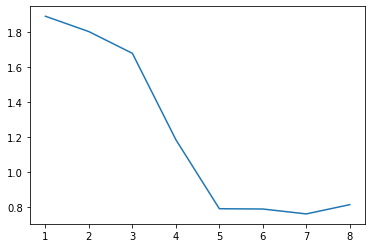

In [44]:
def calculate_NLL(X, kmax=10):
    nll = []
    for k in range(1, kmax+1):
        means, covariances, weights, clusters, avg_log_likelihood = gaussian_mixture_model(X_principal, n_components=k)
        curr_nll = -avg_log_likelihood
        print("k:", k, "NLL:", curr_nll)
        nll.append(curr_nll)
    return nll

# randomie X_principal
X_principal = X_principal.sample(frac=1).reset_index(drop=True)

nll = calculate_NLL(X_principal, kmax=8)

import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes()

x_plot = list(range(1, 9))
ax.plot(x_plot, nll)

In [45]:
means, covariances, weights, clusters, log_likelihood = gaussian_mixture_model(X_principal, n_components=4)

C:\Users\JJ\AppData\Local\Temp/ipykernel_13520/3072930107.py:24: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ellipse = Ellipse(pos, nsig * width, nsig * height, angle)


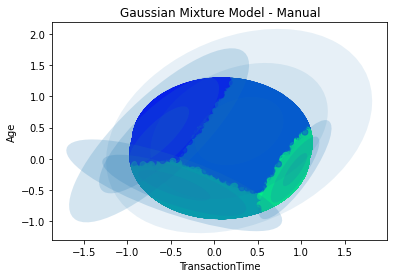

In [46]:
plt.scatter(X_principal['P1'], X_principal['P2'], c = clusters, cmap =plt.cm.winter, alpha = 0.6) 

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse

w_factor = 0.2 / max(weights)

for pos, covar, w in zip(means, covariances, weights):
    w2 = w * w_factor

    # Convert covariance to principal axes
    if covar.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covar)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covar)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ellipse = Ellipse(pos, nsig * width, nsig * height, angle)
        ellipse.set_alpha(w2)
        plt.gca().add_patch(ellipse)

plt.xlabel('TransactionTime')
plt.ylabel('Age')
plt.title('Gaussian Mixture Model - Manual')
plt.show()


En este caso, la métrica de Davis Bouldin Index indica qué tan bien se crearon los clusters del respectivo modelo. Mientras más cercano a 0 esté el valor, mejor. En este caso se obtuvo 0.87.

In [47]:
# Davis Bouldin Index
print("Davis Bouldin Index:", metrics.davies_bouldin_score(X_principal, clusters))

Davis Bouldin Index: 0.9389940489014663


----------
### Task 1.2: Implementacion de Mixture Models con libreria

k: 1 NLL: 1.8918423956987882
k: 2 NLL: 1.3382940303325408
k: 3 NLL: 1.0957583577956107
k: 4 NLL: 0.7688368508136644
k: 5 NLL: 0.6639253748646813
k: 6 NLL: 0.6292587432842226
k: 7 NLL: 0.5504968561679426
k: 8 NLL: 0.5129592622957706


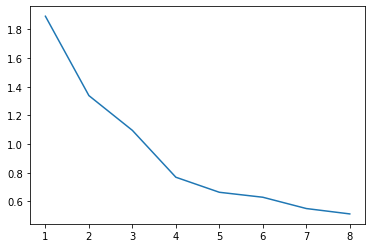

In [48]:
def calculate_NLL(X, kmax=10):
    nll = []
    for k in range(1, kmax+1):
        gmm = GaussianMixture(n_components = k) 
        gmm.fit(X)
        curr_nll = -gmm.score(X)
        print("k:", k, "NLL:", curr_nll)
        nll.append(curr_nll)
    return nll

nll = calculate_NLL(X_principal, kmax=8)

import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes()

x_plot = list(range(1, 9))
ax.plot(x_plot, nll)

In [49]:
gmm = GaussianMixture(n_components = 4) 
gmm.fit(X_principal)

GaussianMixture(n_components=4)

C:\Users\JJ\AppData\Local\Temp/ipykernel_13520/1017357319.py:29: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ellipse = Ellipse(pos, nsig * width, nsig * height, angle)


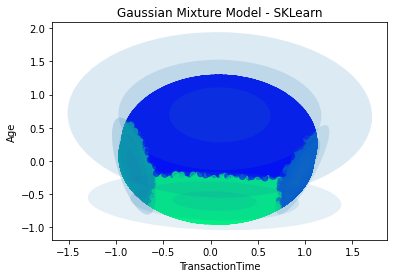

In [50]:
plt.scatter(X_principal['P1'], X_principal['P2'], c = GaussianMixture(n_components = 4).fit_predict(X_principal), cmap =plt.cm.winter, alpha = 0.6) 

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse

# means, covarianzas y pesos del gmm
means = gmm.means_
covariances = gmm.covariances_
weights = gmm.weights_

w_factor = 0.2 / gmm.weights_.max()

for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    w2 = w * w_factor

    # Convert covariance to principal axes
    if covar.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covar)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covar)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ellipse = Ellipse(pos, nsig * width, nsig * height, angle)
        ellipse.set_alpha(w2)
        plt.gca().add_patch(ellipse)

plt.xlabel('TransactionTime')
plt.ylabel('Age')
plt.title('Gaussian Mixture Model - SKLearn')
plt.show()

En este caso, la métrica de Davis Bouldin Index indica qué tan bien se crearon los clusters del respectivo modelo. Mientras más cercano a 0 esté el valor, mejor. En este caso se obtuvo 0.74.

In [51]:
# Davis Bouldin Index
print("Davis Bouldin Index:", metrics.davies_bouldin_score(X_principal, GaussianMixture(n_components = 4).fit_predict(X_principal)))

Davis Bouldin Index: 0.7402651394911546
